# Hyper Alignment of EEG Data

Try stuff. 

In [1]:
%matplotlib inline

import os
import csv

import numpy as np
import matplotlib.pyplot as plt

import mne

from mne.preprocessing import ICA
#from autoreject import AutoReject

In [227]:
# ## Functions
# def org_files(files):
#     """Get the preprocessed, EEG data file names (csv format) a specified subject."""

#     eeg = [fi for fi in files if 'events' not in fi]
#     evs = [fi for fi in files if 'events' in fi]

#     # Quick hack to ignore subjs with problematic files
#     if not len(eeg) == len(evs):
#         print('Oh Shit. Something seems to have gone wrong.')
#         return None, None

#     return eeg, evs

def get_files(files, num):
    """Return specified file type from list of files."""
    
    for file in files:
        if num in file:
            return file

## Settings


In [3]:
# Settings


## Load Data

Dataset description:

The EEG data used is a database collected and made available by the Child Mind Institute.

It is part of the Multimodal Resource for Studying Information Processing in the Developing Brain (MIPDB) database.

MIPDB Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/

EEG Data Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/eeg.html

In [4]:
# Set data path
dat_path = '/Users/tom/Desktop/HyperEEG_Project/Data/'
# ToDo: general stuff to get a list of available subjects

In [5]:
# Set subject to load
sub_num = 'A00063117'
subj_path = os.path.join(dat_path, sub_num, 'EEG', 'raw', 'raw_format')

In [6]:
# Get list of subject files
subj_files = os.listdir(subj_path)

# Restrict to only data files (avoids hidden files, etc)
subj_files = [file for file in subj_files if 'A0' in file]

In [189]:
# Get specific block
f_type = '010'
cur_eeg_file = get_files(subj_files, f_type)

In [190]:
# Load subject of data
raw = mne.io.read_raw_egi(os.path.join(subj_path, cur_eeg_file), preload=True)

Reading EGI header from /Users/tom/Desktop/HyperEEG_Project/Data/A00063117/EEG/raw/raw_format/A00063117 010.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {101 , 102 , 103 , 104 , 106 , 108 , 109 , 11  , 14  , 15  , 16  , 17  , 18  , 20  , 21  , 22  , 23  , 24  , 25  , 26  , 27  , 28  , 30  , 31  , 32  , 33  , 34  , 35  , 4   , 50  , 81  , 82  , 83  , 84  , 86  , 90  , 91  , 92  , 93  , 94  , 95  , 96  , 97  , 98  , 99  , 9999} ...
Reading 0 ... 91850  =      0.000 ...   183.700 secs...


## Set up Data


### Montage

In [191]:
# ToDo: Solve the E129 mystery
#  Note: this might be easier to load the channel file packaged with the dataset

In [228]:
# Load standard montage
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=raw.ch_names)
raw.set_montage(montage)

# Hack for 129
raw.set_channel_types({'E129': 'misc'})

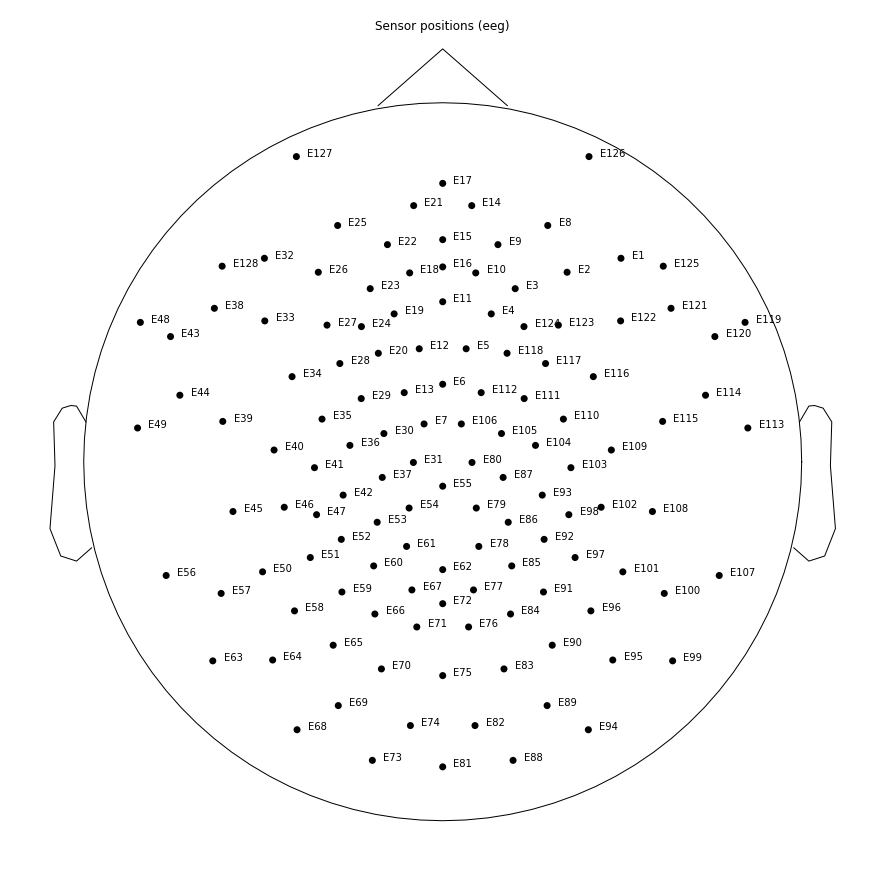

In [193]:
# Check channel locations
fig, ax = plt.subplots(figsize=[12, 12]);
raw.plot_sensors(show_names=True, axes=ax);

### Events

In [194]:
# Check events
dat_evs = mne.find_events(raw)

70 events found
Event IDs: [1 2 3 4 5]


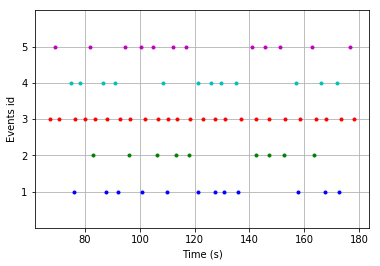

In [195]:
# Check event codes
_ = mne.viz.plot_events(dat_evs, raw.info['sfreq'])

## Sanity Check Data

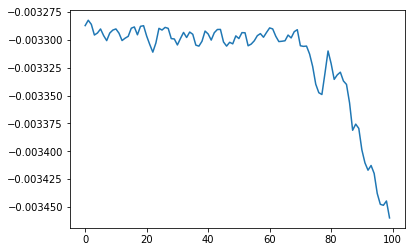

In [196]:
# Print out a small snippet of data
plt.plot(raw._data[0, 0:100])

Effective window size : 4.096 (s)


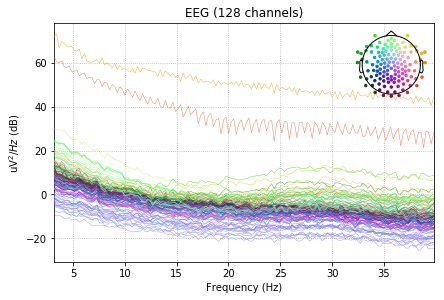

In [201]:
# Check the power spectrum of each channel
raw.plot_psd(tmin=0, fmin=3, fmax=40);

In [202]:
#raw.plot_psd_topo();

## Pre-Processing

Run pre-processing on the data. 

In [250]:
# ToDo: Detect bad channels procedure

In [251]:
# Referencing
raw.set_eeg_reference()

Applying average reference.
Applying a custom EEG reference.


<RawEGI  |  A00063117 010.raw, n_channels x n_times : 181 x 91851 (183.7 sec), ~127.4 MB, data loaded>

### ICA

Note: can run ICA and automatically rejet eye from corralation with very frontal channels: E127. E126

In [233]:
# High pass filter for ICA
#raw.filter(l_freq=1., h_freq=None, fir_design='firwin')

In [234]:
# ICA Settings
#ica_setting_1 = None
#ica_setting_2 = None

In [235]:
# Initialize ICA object
#ica = ICA()

In [236]:
# Fit ICA
#ica.fit(raw)

In [237]:
# You can now use the ICA solution to find EOG related components
#ica.find_bads_eog()

In [238]:
# Plot the ICA components
#ica.plot_components()

In [239]:
# Save out the ICA solution
#ica.save()

### Filtering

In [240]:
# Filter setting
low_freq = 1
high_freq = 20

In [241]:
# Filter EEG data
raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

Setting up band-pass filter from 1 - 20 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 1651 samples (3.302 sec) selected


<RawEGI  |  A00063117 010.raw, n_channels x n_times : 181 x 91851 (183.7 sec), ~127.4 MB, data loaded>

### Epoching

In [242]:
# Epoch settings
tmin, tmax = -0.5, 1

In [243]:
# Epoch data
epochs = mne.Epochs(raw, dat_evs, event_id=1)

12 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 12 events and 351 original time points ...
0 bad epochs dropped
Loading data for 12 events and 351 original time points ...


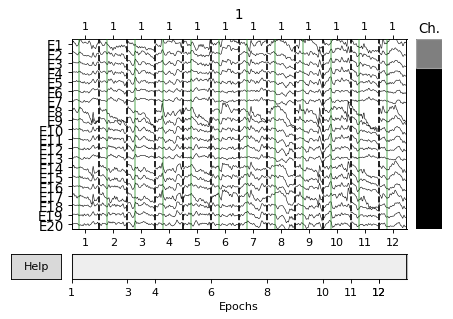

In [244]:
# Sanity check event time series
epochs.plot();

### AutoReject

Note: only works on epoched trials

In [245]:
# Initialize autoreject object
#ar = AutoReject()

In [246]:
# Run AutoReject
#epochs, rej_log = ar.fit_transform(epochs, True)

# Analyses

At this point, the rest becomes specific to the particular analyses that need to be done.

In [221]:
# Calcualte ERPs
evoked = epochs.average()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-248-6cda10a9fd5f>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot();


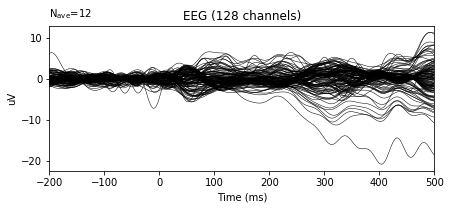

In [248]:
# Plot ERPs
evoked.plot();

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-249-293d67209045>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_topomap([-0.1, 0, 0.200, 0.4]);


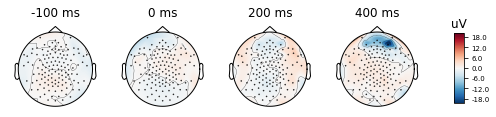

In [249]:
# Check topographies across time
evoked.plot_topomap([-0.1, 0, 0.200, 0.4]);